# Objective is to predict if a person has diabetes or not

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
for i in data.columns:
    print ("The unique values of {} is {}".format(i,len(data[i].unique())))
#Calculating the unique values of each column

The unique values of Pregnancies is 17
The unique values of Glucose is 136
The unique values of BloodPressure is 47
The unique values of SkinThickness is 51
The unique values of Insulin is 186
The unique values of BMI is 248
The unique values of DiabetesPedigreeFunction is 517
The unique values of Age is 52
The unique values of Outcome is 2


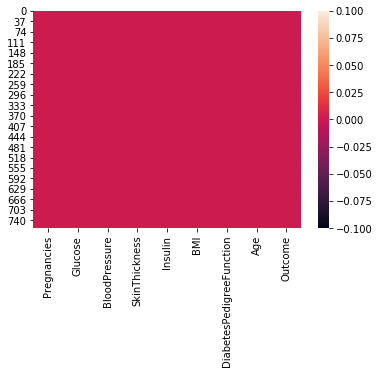

In [7]:
#missing values
sns.heatmap(data.isnull())
#Data set contains no missing values

Text(0.5, 0.98, 'Diabetes and their Correlation Heatmap')

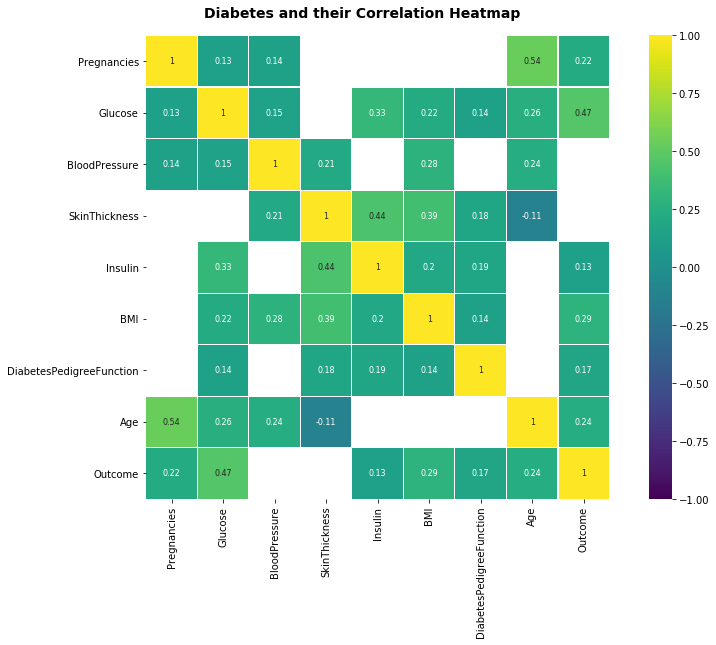

In [27]:
#Find correlation
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))
#sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2,cmap='PiYG')#'PiYG'#"bwr"
corr=data.corr()
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
fig.subplots_adjust(top=0.93)
fig.suptitle('Diabetes and their Correlation Heatmap', fontsize=14, fontweight='bold')
#So as we can see there are correlation between few columns. Age is highly correlated with Pregnancies. Insulin is highly correlated with skinthickness. Also skinthickness is correlated with BMI.
#Output has the highest linear correlation with Glucose, BMI and Age

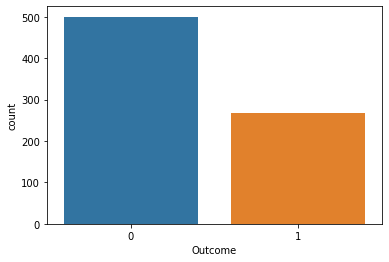

In [10]:
sns.countplot(data['Outcome'])
#More non diabetic than diabetic

In [15]:

## Defining a function to plot histogram for all the independent variable
def plot_variables(variable):

    f, axes = plt.subplots(3, 1, figsize=(10, 10))
    
    sns.distplot(data[variable][data['Outcome']==1],ax=axes[0],color='green')
    axes[0].set_title(r"Distribution of {}-Diabetic Outcome".format(variable))
    sns.distplot(data[variable][data['Outcome']==0],ax=axes[1],color='red')
    axes[1].set_title(r"Distribution of {}-Non Diabetic Outcome".format(variable))
    sns.boxplot(x=data['Outcome'],y=data[variable],ax=axes[2],palette="Set3")
    axes[2].set_title(r"Boxplot of {}".format(variable))
    f.tight_layout()

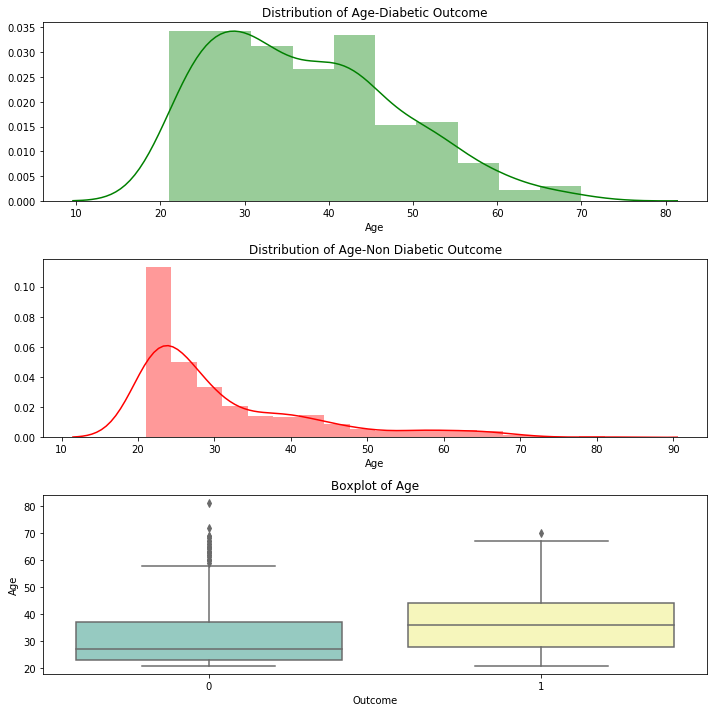

In [16]:
plot_variables("Age")
#Non normal distribution .
#The histogram for age -diabetic outcome seems to be multimodal with modes centered around 20-30 years and again at 50 years whereas the histogram for age-non diabetic outcome is at 20 years .
#The distribution is skewed towards right for age-non diabetic outcome .
#There is a significant difference between the outcome and age as seen from the boxplot .The median age for a diabetic is higher compared to a non-diabetic .
#There are also many outliers in age for non-diabetic outcome compared to a diabetic outcome.

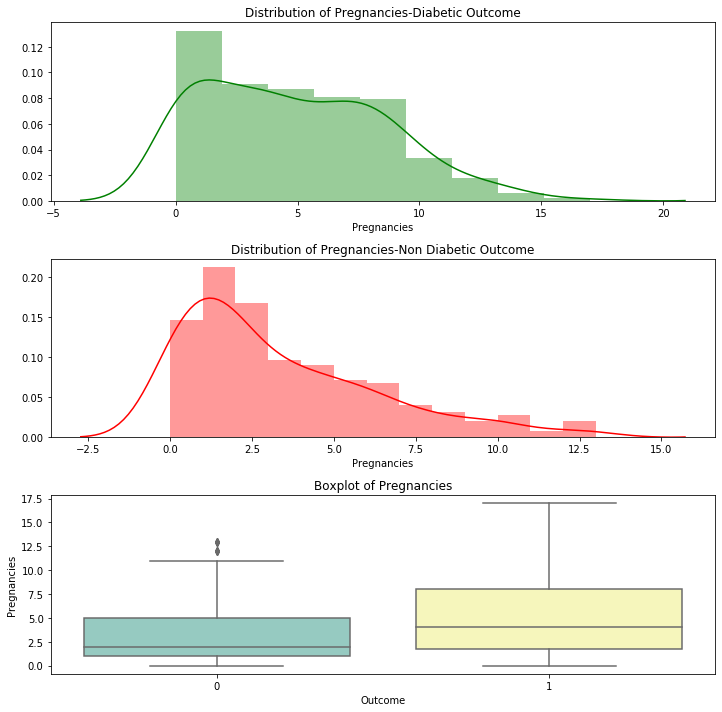

In [17]:
plot_variables('Pregnancies')
#it seems that for a diabetic outcome , the data is skewed towards right .
#The median number of pregnancies is higher for a diabetic when compared to a non-diabetic outcome .
#Thus the outcome with respect to pregnancies is also significant.

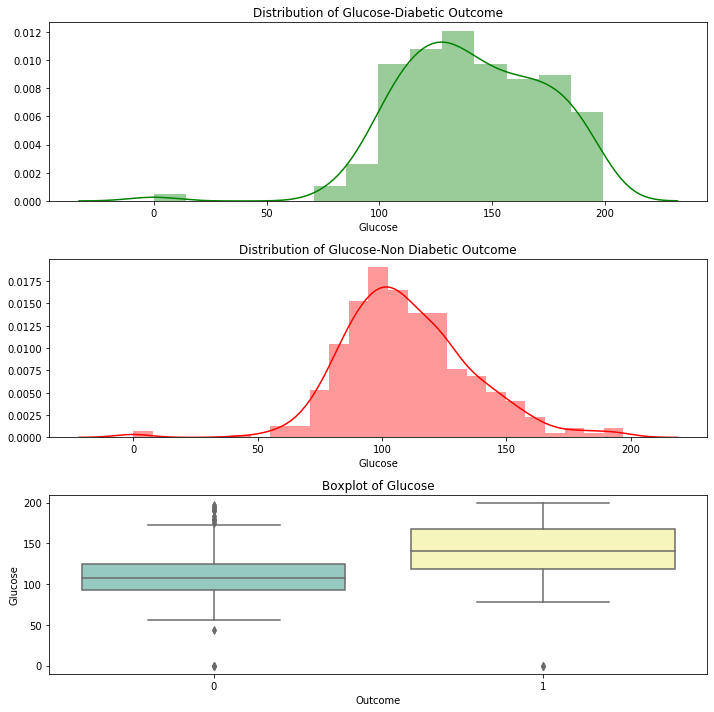

In [18]:
plot_variables('Glucose')
#median value of a non diabetic person is around 100 and for a diabetic person is around 150.we do see some outliers too in non diabetic


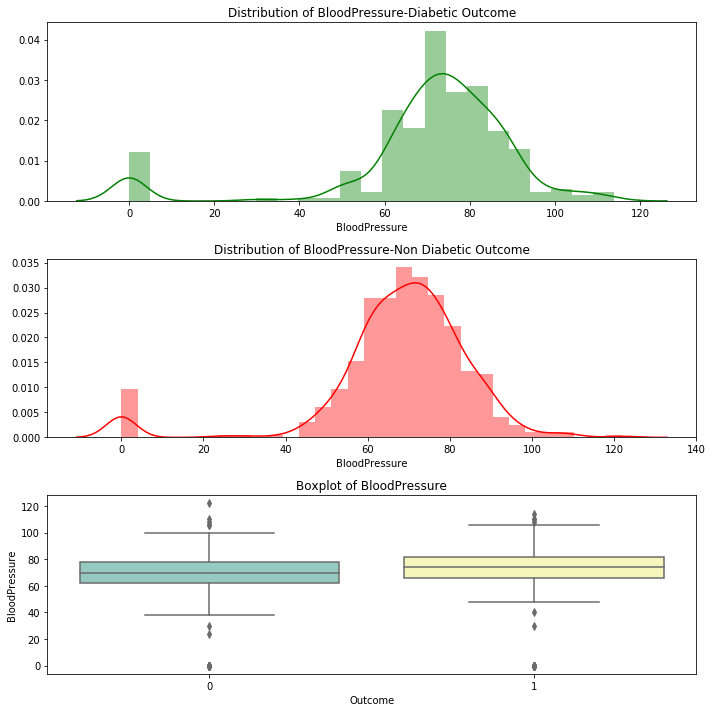

In [21]:
plot_variables('BloodPressure')
#A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.
#median value is higher for diabetic person .We see 0 Blood pressure which are outliers

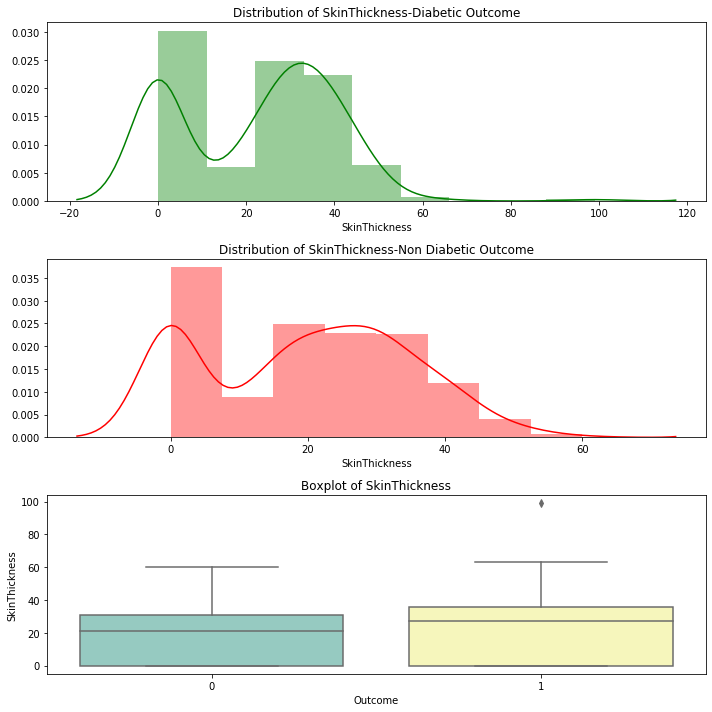

In [22]:
plot_variables('SkinThickness')
#Distribution is multimodal
#median is similar which means it might not be a good variable for predicting outcomes

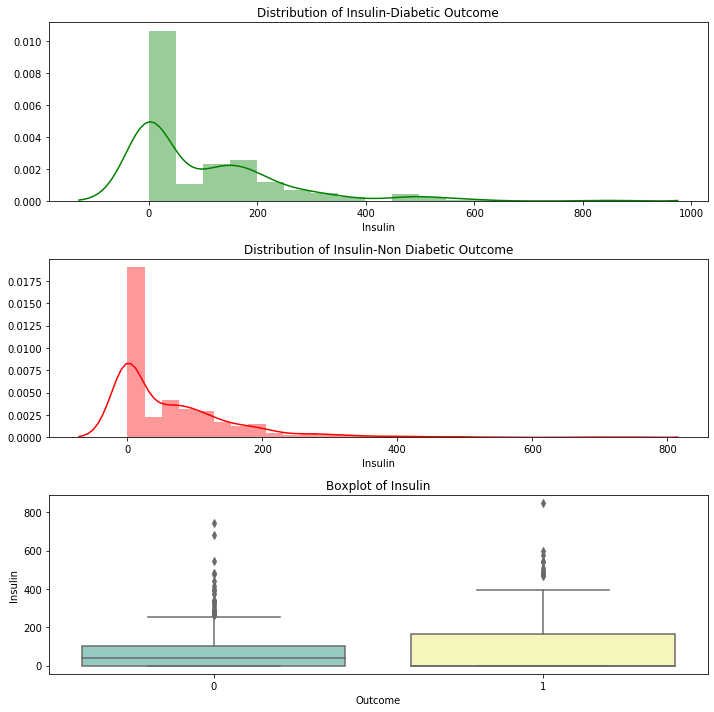

In [23]:
plot_variables('Insulin')
#Skewed distribution for both outcomes . 
#Presence of outliers for both the outcomes .The median value of insulin is close to zero in case of diabetic outcome.There is a significant difference between the outcomes with respect to insulin levels.
#Therefore this might be a good predictor of outcome.

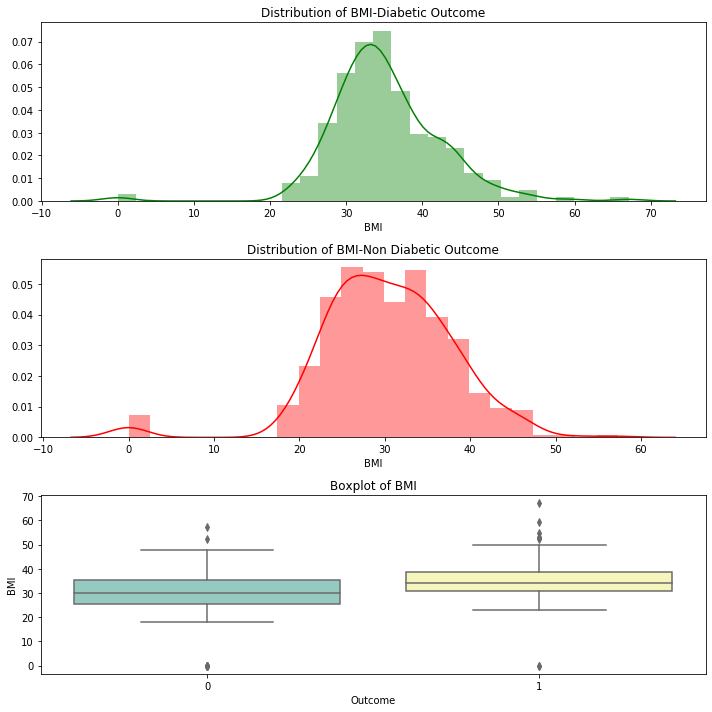

In [24]:
plot_variables('BMI')
#The median BMI value for a non-diabetic outcome is higher compared to a non-diabetic outcome 

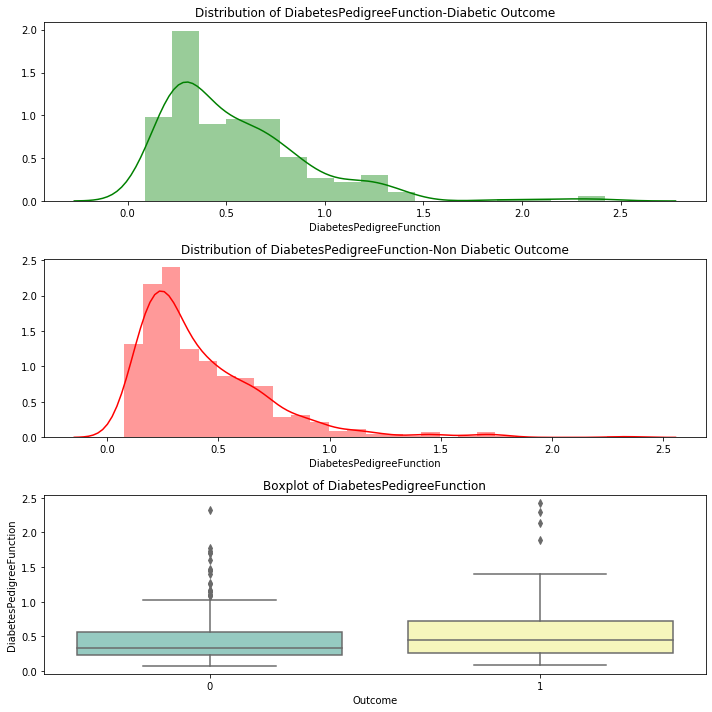

In [25]:
plot_variables('DiabetesPedigreeFunction')
#Skewed distribution.Median almost similar